# Распознавание британских гласных по данным с динамиков

Есть выборка элементов из 11 классов. Они описываются 10 признаками. Предлагается решить задачу многоклассовой классификации методом решающих деревьев.

Рекомендовано использовать отмасштабированные признаки. Дело в том, что неотмасштабированные признаки могут негативно влиять на качество алгоритма.

## Решающее дерево

Идея решающего дерева проста - в каждом узле мы сравниваем некоторый признак с так называемым порогом. В зависимости от ответа мы спускаемся либо в левое, либо в правое поддерево. В конце концов мы доходим до листа дерева, где мы и делаем предсказание.
В результате обучения мы должны получить некоторую разделяющую кусочно-постоянную поверхность, отрезки которой параллельны осям. Эта поверхность разделяет объекты разных классов в пространстве признаков.

###  Переобучение
Несмотря на кажущуюся простоту, мы можем столкнуться с проблемой переобучения, т.е. когда алгоритм будет хорошо работать на обучающей выборке, но гораздо хуже на тестовой. В этом случае разделяющая поверхность будет очень сложной, потому что будет стараться отнести каждый объект в правильный класс. 

Чтобы избежать переобучение, используятся разные методы, например, критерий останова и стрижка деревьев.

* Критерии останова используется, чтобы принять решение о необходимости продолжения ветвления дерева:
    - Проверка количества элементов в листе: разбиение продолжается, если количество элементов больше некоторого заданного числа (обычно это 5)
    - Глубина дерева (грубый): построение продолжается, пока дерево не достаточно глубокое.
    
* Стрижка деревьев: строим самое сложное дерево, а затем удаляем листья, пока улучшается качество некоторой отложенной выборки.

### Выбор порога

Рассмотрим подробнее выбор порогового значения. Предположим, что в некоторый лист $m$ попало подмножество выборки $X_m$. Чтобы продолжить построение дерева, нужно выбрать признак $x_j$ и его пороговое значение $t$ так, чтобы минимизировать критерий ошибки, зависящий от этих параметров.
$$Q(X_m, j, t) \rightarrow \min_\limits{j,t}$$

Пусть параметры выбраны, и в левое поддерево ушли элементы из подмножества $X_l$, а в правое поддерево - из подмножества $X_r$. Критерий ошибки примет вид: $$Q(X_m, j, t) = \dfrac{|X_l|}{|X_m|}H(X_l) + \dfrac{|X_r|}{|X_m|}H(X_r),$$ где функция $H(X)$ - критерий информативности: ее значение тем меньше, чем меньше разброс ответов в $X$. 

В используемом классификаторе таким критерием является критерий Джини.
Пусть $p_k$ - доля объектов класса $k$ в выборке $X$. Тогда критерий информативности Джини формулируется так: 
$$H(X) = \sum_{k=1}^{K}p_k(1-p_k)$$

Одна из интерпретаций критерия Джини — это вероятность ошибки случайного классификатора.

In [ ]:
#своими руками

def gini_index(group, classes):
    
    
    

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cross_validation, tree, metrics, datasets
from matplotlib.colors import ListedColormap
import graphviz

In [96]:
X, y = datasets.load_svmlight_file("vowel_scaled.csv")
X_test, y_test = datasets.load_svmlight_file("vowel_scaled_test.csv")

In [97]:
X = np.array(X.todense())
X_test = np.array(X_test.todense())


Необходимости разбивать на обучающую и тестовую выборки нет, поскольку на сайте есть отдельный файл.

In [98]:
#создадим классификатор

train_accuracy = []
test_accuracy = []
best_accuracy = 0
best_depth = 0
best_samples = 0
for depth in range(1, 25):
    dtclf = tree.DecisionTreeClassifier(max_depth=depth, random_state = 0)
    dtclf.fit(X, y)
    predictions_train = dtclf.predict(X)
    accuracy_train = metrics.accuracy_score(y, predictions_train)
    predictions_test = dtclf.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, predictions_test)
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    print 'for depth {} accuracy on train set is {}, on test set is {}'.format(depth, accuracy_train, accuracy_test)

for depth 1 accuracy on train set is 0.170454545455, on test set is 0.166666666667
for depth 2 accuracy on train set is 0.297348484848, on test set is 0.255411255411
for depth 3 accuracy on train set is 0.454545454545, on test set is 0.272727272727
for depth 4 accuracy on train set is 0.581439393939, on test set is 0.367965367965
for depth 5 accuracy on train set is 0.698863636364, on test set is 0.41341991342
for depth 6 accuracy on train set is 0.768939393939, on test set is 0.426406926407
for depth 7 accuracy on train set is 0.86553030303, on test set is 0.4329004329
for depth 8 accuracy on train set is 0.914772727273, on test set is 0.424242424242
for depth 9 accuracy on train set is 0.950757575758, on test set is 0.4329004329
for depth 10 accuracy on train set is 0.967803030303, on test set is 0.437229437229
for depth 11 accuracy on train set is 0.977272727273, on test set is 0.424242424242
for depth 12 accuracy on train set is 0.986742424242, on test set is 0.452380952381
for dep

Text(0,0.5,u'accuracy')

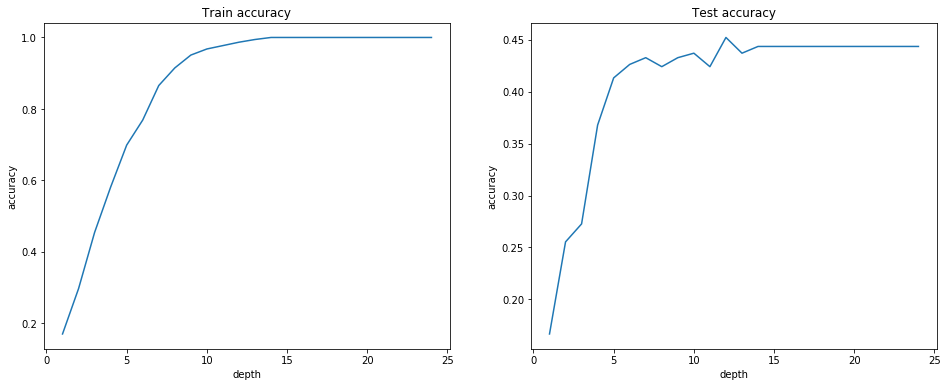

In [99]:

plt.figure(figsize = (16, 6))


plt.subplot(1,2,1)
plt.plot(np.arange(1,25, 1), train_accuracy)
plt.title('Train accuracy')
plt.xlabel('depth')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(np.arange(1,25, 1), test_accuracy)
plt.title('Test accuracy')
plt.xlabel('depth')
plt.ylabel('accuracy')

Видим, что переобучения из-за слишком большой глубины дерева не произошло. (У нас не так много признаков)

Поэксперементируем с количеством элементов в листьях.

In [100]:
train_accuracy = []
test_accuracy = []
best_accuracy = 0
best_depth = 0
best_samples = 0
for samples in range(1, 25):
    dtclf = tree.DecisionTreeClassifier(min_samples_leaf=samples, max_depth=15, random_state=0)
    dtclf.fit(X, y)
    predictions_train = dtclf.predict(X)
    accuracy_train = metrics.accuracy_score(y, predictions_train)
    predictions_test = dtclf.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, predictions_test)
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)
    print 'for min samples {} accuracy on train set is {}, on test set is {}'.format(samples, accuracy_train, accuracy_test)

for min samples 1 accuracy on train set is 1.0, on test set is 0.443722943723
for min samples 2 accuracy on train set is 0.971590909091, on test set is 0.409090909091
for min samples 3 accuracy on train set is 0.956439393939, on test set is 0.430735930736
for min samples 4 accuracy on train set is 0.92803030303, on test set is 0.417748917749
for min samples 5 accuracy on train set is 0.918560606061, on test set is 0.424242424242
for min samples 6 accuracy on train set is 0.888257575758, on test set is 0.443722943723
for min samples 7 accuracy on train set is 0.88446969697, on test set is 0.428571428571
for min samples 8 accuracy on train set is 0.867424242424, on test set is 0.387445887446
for min samples 9 accuracy on train set is 0.829545454545, on test set is 0.393939393939
for min samples 10 accuracy on train set is 0.787878787879, on test set is 0.393939393939
for min samples 11 accuracy on train set is 0.744318181818, on test set is 0.409090909091
for min samples 12 accuracy on t

Text(0,0.5,u'accuracy')

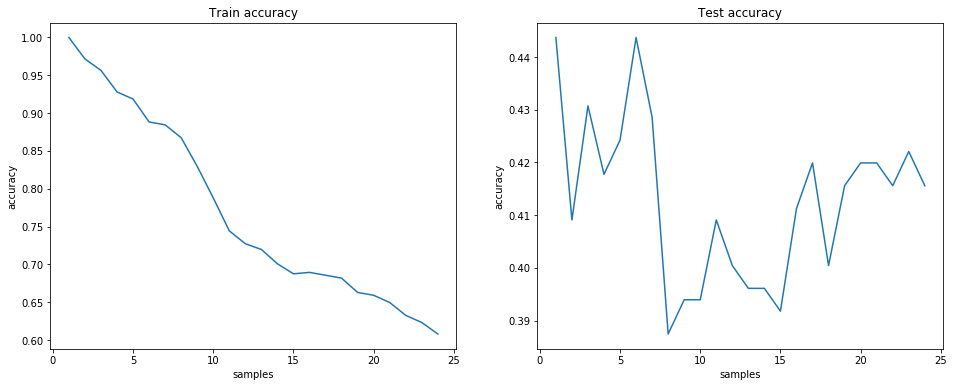

In [101]:
plt.figure(figsize = (16, 6))


plt.subplot(1,2,1)
plt.plot(np.arange(1,25, 1), train_accuracy)
plt.title('Train accuracy')
plt.xlabel('samples')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(np.arange(1,25, 1), test_accuracy)
plt.title('Test accuracy')
plt.xlabel('samples')
plt.ylabel('accuracy')

In [149]:

best_dfclf = tree.DecisionTreeClassifier(min_samples_leaf=6, max_depth = 10, random_state = 0)
best_dfclf.fit(X, y)
metrics.accuracy_score(y_test, best_dfcfl.predict(X_test))

dot_data = tree.export_graphviz(best_dfclf, filled=True, rounded=True, out_file=None) 
graph = graphviz.Source(dot_data)
graph.filename
graph

TypeError: 'str' object is not callable

Построим разделяющую поверхность.

In [113]:

colors = ListedColormap(['red', 'blue', 'yellow', 'black', 'brown', 'grey', 'purple', 'green', 'aqua'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'dimgray', 'chocolate', 'silver', 'mediumorchid', 'lightgreen', 'powderblue'])



In [123]:
#спасибо курсу "обучение на размеченных данных"

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    #plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

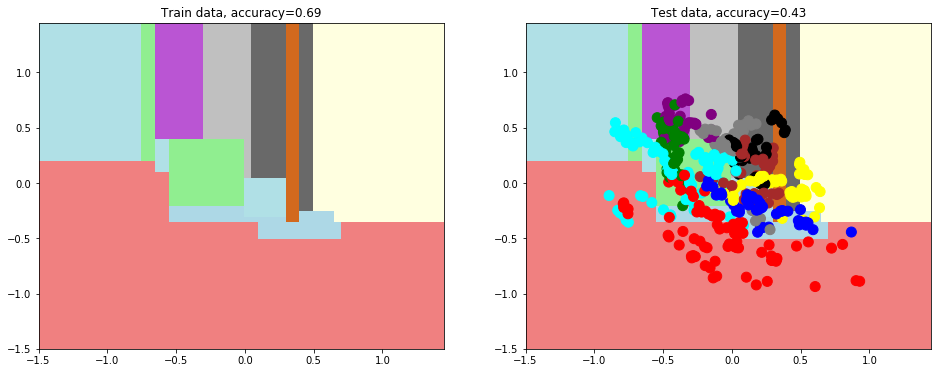

In [146]:
plot_decision_surface(tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf=6), X[:,0:2], y, X_test[:,0:2], y_test)

На мой взгляд, этот результат весьма хорош, учитывая особенности английских гласных :)